In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL  #displaying of images 
import tensorflow as tf  # 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos', origin= dataset_url, untar=True)
data_dir=pathlib.Path(data_dir)
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


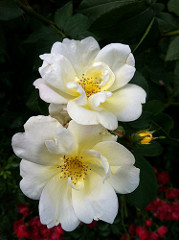

In [3]:
roses= list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))


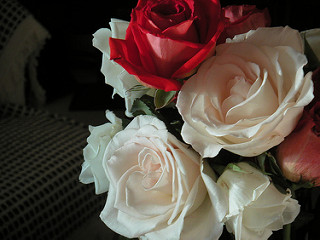

In [4]:
PIL.Image.open(str(roses[1]))

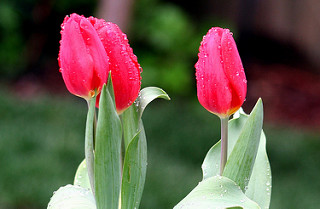

In [5]:
tulips= list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))



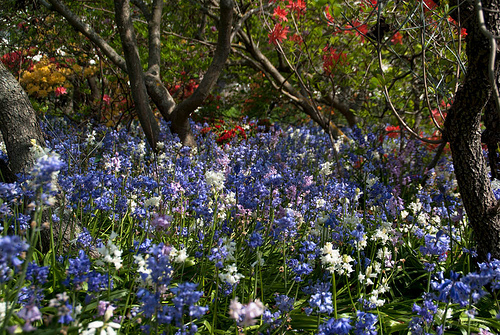

In [6]:
PIL.Image.open(str(tulips[1]))

In [7]:
batch_size=32
imgheight=180
imgwidth=180

In [8]:
trainds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2, subset='training', seed=123, 
                                                            image_size=(imgheight, imgwidth), batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
testds=tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset='validation', seed=123, image_size=(imgheight, imgwidth), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
classnames=trainds.class_names
classnames


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [11]:
plt.figure(figsize=(10,10))
for images, lables in trainds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
	plt.imshow(images[i].numpy().astype("uint8"))

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-11-8b4a9251d198>, line 5)

In [ ]:
for image_batch, lables_batch in trainds:
    print(image_batch.shape)
    print(lables_batch.shape)
    break


In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
trainds=trainds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
testds=testds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
normalizationlayer=layers.experimental.preprocessing.Rescaling(1./255)

num_class=5
model=Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(imgheight, imgwidth, 3)),
layers.Conv2D(16,3,padding='same', activation='relu'), layers.MaxPooling2D(),
layers.Conv2D(32,3,padding='same', activation='relu'), layers.MaxPooling2D(),
layers.Conv2D(64,3,padding='same', activation='relu'), layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_class)])

In [ ]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [ ]:
epochs=4
history=model.fit(trainds,validation_data= testds, epochs=epochs)

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

In [ ]:
img=keras.preprocessing.image.load_img(sunflower_path, target_size=(imgheight, imgwidth))
img_array= keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array, 0)


In [ ]:
pred= model.predict(img_array)
score=tf.nn.softmax(pred[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classnames[np.argmax(score)], 100 * np.max(score))
)